In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [47]:
src_path_train = "out_faces"
src_path_test = "test_set_a"
src_path_anomaly = "anomaly_test"

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        # rotation_range=20,
        # zoom_range=0.05,
        # width_shift_range=0.05,
        # height_shift_range=0.05,
        # shear_range=0.05,
        # horizontal_flip=True,
        # fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [48]:
batch_size = 8
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(100, 100),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='input',
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(100, 100),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='input',
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(100, 100),
    color_mode="grayscale",
    batch_size=1,
    class_mode='input',
    shuffle=False,
    seed=42
)

anomaly_test_generator = test_datagen.flow_from_directory(
    directory=src_path_anomaly,
    target_size=(100, 100),
    color_mode="grayscale",
    batch_size=1,
    class_mode='input',
    shuffle=False,
    seed=42
)

Found 386 images belonging to 1 classes.
Found 96 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 17 images belonging to 1 classes.


In [55]:
input = layers.Input(shape=(100, 100, 1))

# Encoder
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose_20 (Conv2D  (None, 50, 50, 32)       924

In [56]:
history = autoencoder.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=60, verbose=1)

Epoch 1/60
48/48 [==============================] - 2s 24ms/step - loss: 0.0214 - val_loss: 0.0059
Epoch 2/60
48/48 [==============================] - 1s 18ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 3/60
48/48 [==============================] - 1s 17ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 4/60
48/48 [==============================] - 1s 16ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/60
48/48 [==============================] - 1s 16ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 6/60
48/48 [==============================] - 1s 16ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 7/60
48/48 [==============================] - 1s 16ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/60
48/48 [==============================] - 1s 16ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 9/60
48/48 [==============================] - 1s 16ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/60
48/48 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/

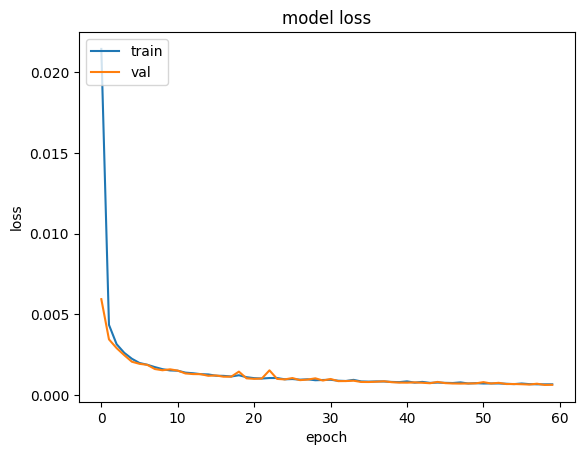

In [57]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
autoencoder.evaluate(anomaly_test_generator)

17/17 [==============================] - 0s 10ms/step - loss: 8.2115e-04


0.0008211542735807598

In [58]:
autoencoder.evaluate(test_generator)

17/17 [==============================] - 0s 11ms/step - loss: 6.4133e-04


0.0006413261871784925

In [66]:
out_arr = autoencoder.predict(anomaly_test_generator)

17/17 [==============================] - 0s 6ms/step


In [63]:
import matplotlib.pyplot as plt

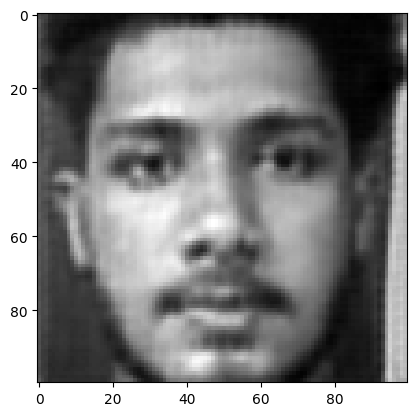

In [67]:
plt.imshow(out_arr[0], cmap='gray')

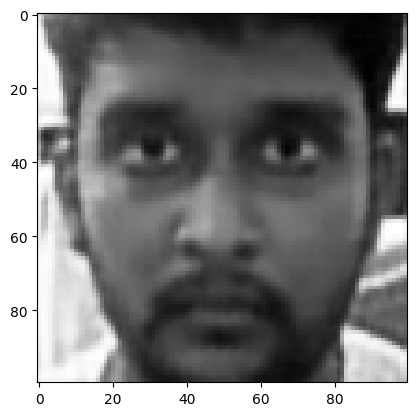

In [65]:
plt.imshow(out_arr[0], cmap='gray')